In [12]:
#create python tool for sentimental analysis 
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import IPython.display 
from IPython.display import display
import seaborn as sns
%matplotlib inline

In [13]:
'''
#twitter access tokens
consumer_key='GTc2RpxcK3Y5wKhAjciEMYbj7'
consumer_secret='9hDJLhr37sQUcKvbdoWCUQD3u8SLX75Mo0DwiSqvBGf0sLUKq0'
access_key='775314049563111424-hmWCttrszUBJ5KBqTJyvR3bzcTkP4As'
sccess_secret='2M00eOoTvAiHjm8NXQYquWprfMgPv9pSRleMbFZlGDEGQ''''


SyntaxError: EOL while scanning string literal (<ipython-input-13-576723b24a88>, line 6)

In [14]:
import sys
sys.path.append('/Users/darshandoshi/Desktop/git-repositiories')
import credentials 
from credentials import *

In [15]:
#twitter api setup
def setup():
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key,sccess_secret)
    api=tweepy.API(auth)
    return api


In [16]:
extract = setup()
tweets = extract.user_timeline(screen_name = 'espn',count = 200)
print('number of tweets extracted : {}',len(tweets))
print('5 recent tweets:')
for t in tweets[:10]:
    print(t.text)
    

PARAMS: {'screen_name': b'espn', 'count': b'200'}
number of tweets extracted : {} 200
5 recent tweets:
LeBron and Kyrie have arrived for their 3:30 p.m. ET showdown on ABC. https://t.co/GBoRv0SXPo
LeBatman https://t.co/MvbMLk5rpA
The Celtics will raise Paul Pierce's No. 34 to the rafters today.

But when he looks back, he knows he couldn't hav… https://t.co/ZkOM21yVnm
Mechelle McNair was determined to keep her sons safe and carry on with living after burying her husband nearly a de… https://t.co/Dos02dvR3W
When you travel 6,500 miles to meet Vince Carter, tossing him an alley-oop is just the cherry on top. (via… https://t.co/qsfCp3ezSW
Rondo and AD were DETERMINED to get the @StateFarm Assist of the Week. https://t.co/fntV0v5OmA
Haters will say it’s fake. #PhotoOfTheNight https://t.co/h3XcuF6vpf
22 points and 6 assists for the newest Laker. https://t.co/PR9VN5WUFG
DAGGER https://t.co/h9Atw42Hak
This is going to take some getting used to. https://t.co/a6QWr5jLUg


In [17]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['tweets'])

In [18]:
display(data.head(10))

,tweets
0,LeBron and Kyrie have arrived for their 3:30 p...
1,LeBatman https://t.co/MvbMLk5rpA
2,The Celtics will raise Paul Pierce's No. 34 to...
3,Mechelle McNair was determined to keep her son...
4,"When you travel 6,500 miles to meet Vince Cart..."
5,Rondo and AD were DETERMINED to get the @State...
6,Haters will say it’s fake. #PhotoOfTheNight ht...
7,22 points and 6 assists for the newest Laker. ...
8,DAGGER https://t.co/h9Atw42Hak
9,This is going to take some getting used to. ht...


In [19]:
#adding relevant data
data['len']=np.array([len(tweet.text) for tweet in tweets])
data['ID']=np.array([tweet.id for tweet in tweets])
data['Date']=np.array([tweet.created_at for tweet in tweets])
data['Source']=np.array([tweet.source for tweet in tweets])
data['Likes']=np.array([tweet.favorite_count for tweet in tweets])
data['RTs']=np.array([tweet.retweet_count for tweet in tweets])

In [20]:
data.head(10)

,tweets,len,ID,Date,Source,Likes,RTs
0,LeBron and Kyrie have arrived for their 3:30 p...,93,962761142685839360,2018-02-11 18:51:58,Spredfast app,1119,220
1,LeBatman https://t.co/MvbMLk5rpA,32,962751099450134528,2018-02-11 18:12:03,Spredfast app,4283,977
2,The Celtics will raise Paul Pierce's No. 34 to...,140,962738683102334976,2018-02-11 17:22:43,Spredfast app,4513,989
3,Mechelle McNair was determined to keep her son...,140,962725473754198016,2018-02-11 16:30:14,Spredfast app,1627,523
4,"When you travel 6,500 miles to meet Vince Cart...",131,962708344535470080,2018-02-11 15:22:10,Spredfast app,19213,3907
5,Rondo and AD were DETERMINED to get the @State...,94,962693271486115840,2018-02-11 14:22:16,Spredfast app,1857,236
6,Haters will say it’s fake. #PhotoOfTheNight ht...,67,962680491949338624,2018-02-11 13:31:29,Spredfast app,2357,288
7,22 points and 6 assists for the newest Laker. ...,69,962575444452225030,2018-02-11 06:34:04,Spredfast app,21038,4438
8,DAGGER https://t.co/h9Atw42Hak,30,962563171302170624,2018-02-11 05:45:18,Spredfast app,6186,1411
9,This is going to take some getting used to. ht...,67,962544249546960897,2018-02-11 04:30:06,Spredfast app,6295,1075


In [25]:
def get_fav_tweet():
    max_likes = np.max(data['Likes'])
    fav=data.loc[data['Likes'] == max_likes]

    for i in range(len(fav)):
        print("The tweet with more likes is: \n{}".format(data['tweets'][fav.index[i]]))
        print("Number of likes: \n{}".format(data['Likes'][fav.index[i]]))
    
   

In [26]:
get_fav_tweet()

The tweet with more likes is: 
Texas guard Andrew Jones is not letting leukemia keep him from getting up some shots. https://t.co/3Wr26bkkAT
Number of likes: 
63760


In [28]:
def get_rt_tweet():
    max_rt = np.max(data['RTs'])
    rt=data.loc[data['RTs']== max_rt]
    for i in range(len(rt)):
        print("The tweet with more RTs: \n{}".format(data['tweets'][rt.index[i]]))
        print("Number of RTs: \n{}".format(data['RTs'][rt.index[i]]))

In [29]:
get_rt_tweet()

The tweet with more RTs: 
RT @SportsCenter: JR looking at his teammates in practice tomorrow like ... https://t.co/PEgE0qc33d
Number of RTs: 
35764


In [30]:
tlike = pd.Series(data=data['Likes'].values,index=data['Date'])
trt = pd.Series(data=data['RTs'].values,index=data['Date'])
tlen = pd.Series(data=data['len'].values, index=data['Date'])

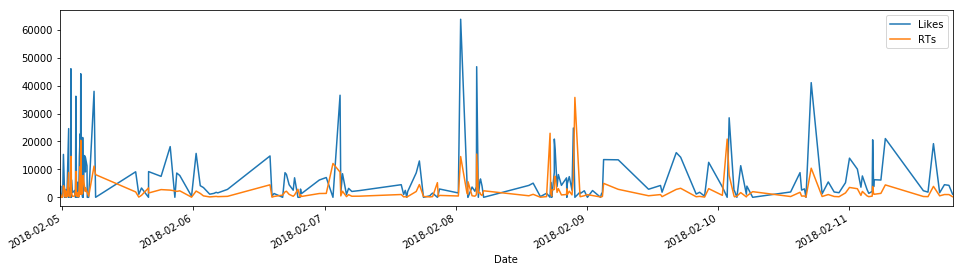

In [31]:
tlike.plot(figsize=(16,4),label="Likes",legend=True);
trt.plot(figsize=(16,4),label="RTs",legend=True);

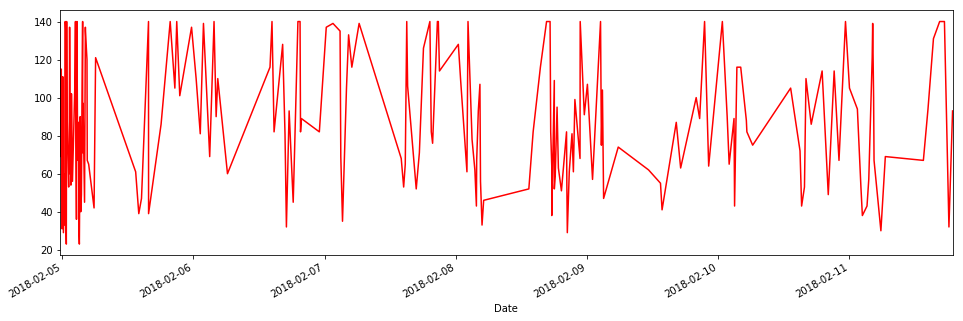

In [32]:
tlen.plot(figsize=(16,5), color='r');

In [168]:
data['Likes'].values

array([  1472,   7911,    343,   1582,   1014,  11220,  14048,   1657,
         4043,   2707,  12221,  13073,   1757,   1168,      0,   2400,
            0,   2321,   1318,   1835,      0,  23899,   2514,   7325,
         4871,      0,   6895,   4259,   8110,   3893,  16458,  20710,
         8921,      0,   1693,   5399,      0,   1425,    249,   4995,
         4257,      0,   4026,   6562,   5930,      0,  46603,   3802,
         2163,   3665,      0,      0,   6008,  63070,   1548,   2972,
         1038,      0,   1499,   1108,    530,      0,  12949,   8735,
         2027,      0,   2472,    988,   4493,   2389,   2095,   3194,
         1012,   8451,   1506,  36450,      0,   7080,   6185,   1298,
         2941,      0,      0,   6985,   2526,   4502,   8201,   8801,
            0,   1351,    471,  14765,   2829,   1583,   1773,   1416,
         1115,   3468,   4153,  15708,    381,   7809,   8680,      0,
        18133,   7495,   9202,      0,   3322,   1084,   9134,      0,
      

In [33]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Spredfast app
* TweetDeck
* Twitter for iPhone
* Twitter Web Client


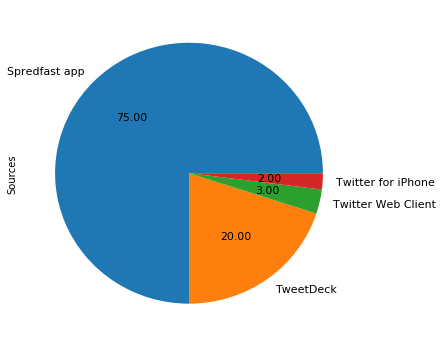

In [34]:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
for source in sources:
    pie_chart = pd.Series(percent, index=np.unique(sources), name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [188]:
data["Source"]

0           Spredfast app
1           Spredfast app
2           Spredfast app
3           Spredfast app
4           Spredfast app
5           Spredfast app
6           Spredfast app
7           Spredfast app
8           Spredfast app
9           Spredfast app
10          Spredfast app
11          Spredfast app
12          Spredfast app
13          Spredfast app
14              TweetDeck
15          Spredfast app
16     Twitter for iPhone
17          Spredfast app
18          Spredfast app
19          Spredfast app
20              TweetDeck
21          Spredfast app
22          Spredfast app
23          Spredfast app
24              TweetDeck
25              TweetDeck
26          Spredfast app
27          Spredfast app
28     Twitter Web Client
29          Spredfast app
              ...        
170         Spredfast app
171         Spredfast app
172    Twitter Web Client
173         Spredfast app
174         Spredfast app
175         Spredfast app
176         Spredfast app
177         

In [3]:
import pip
pip.main(['install','textblob'])

0

In [35]:
from textblob import TextBlob
import re

In [36]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    

In [40]:
def analyze(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity < 0:
        return -1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return 1

In [43]:
data['SA']=np.array([analyze(tweet) for tweet in data['tweets']])

In [44]:
display(data.head(10))

,tweets,len,ID,Date,Source,Likes,RTs,SA
0,LeBron and Kyrie have arrived for their 3:30 p...,93,962761142685839360,2018-02-11 18:51:58,Spredfast app,1119,220,0
1,LeBatman https://t.co/MvbMLk5rpA,32,962751099450134528,2018-02-11 18:12:03,Spredfast app,4283,977,0
2,The Celtics will raise Paul Pierce's No. 34 to...,140,962738683102334976,2018-02-11 17:22:43,Spredfast app,4513,989,0
3,Mechelle McNair was determined to keep her son...,140,962725473754198016,2018-02-11 16:30:14,Spredfast app,1627,523,1
4,"When you travel 6,500 miles to meet Vince Cart...",131,962708344535470080,2018-02-11 15:22:10,Spredfast app,19213,3907,1
5,Rondo and AD were DETERMINED to get the @State...,94,962693271486115840,2018-02-11 14:22:16,Spredfast app,1857,236,0
6,Haters will say it’s fake. #PhotoOfTheNight ht...,67,962680491949338624,2018-02-11 13:31:29,Spredfast app,2357,288,-1
7,22 points and 6 assists for the newest Laker. ...,69,962575444452225030,2018-02-11 06:34:04,Spredfast app,21038,4438,0
8,DAGGER https://t.co/h9Atw42Hak,30,962563171302170624,2018-02-11 05:45:18,Spredfast app,6186,1411,0
9,This is going to take some getting used to. ht...,67,962544249546960897,2018-02-11 04:30:06,Spredfast app,6295,1075,0


In [59]:
neu_tweet=data.loc[data['SA']==1]
pos_tweet=data.loc[data['SA']>0]
neg_tweet=data.loc[data['SA']<0]

In [60]:
#percentage
print("Percentage of positive tweet= {}".format(len(pos_tweet)*100/len(data['tweets'])))
print("Percentage of negative tweet= {}".format(len(neg_tweet)*100/len(data['tweets'])))
print("Percentage of neutral tweet= {}".format(len(neu_tweet)*100/len(data['tweets'])))

Percentage of positive tweet= 40.5
Percentage of negative tweet= 13.5
Percentage of neutral tweet= 40.5


In [63]:
tlike = pd.Series(data=data['Likes'].values,index=data['Date'])
tpos=pd.Series(data=data['SA'].values,index=data['Date'])

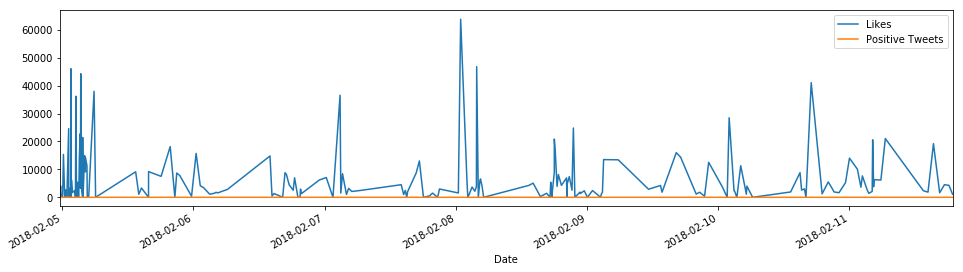

In [64]:
tlike.plot(figsize=(16,4),label="Likes",legend=True);


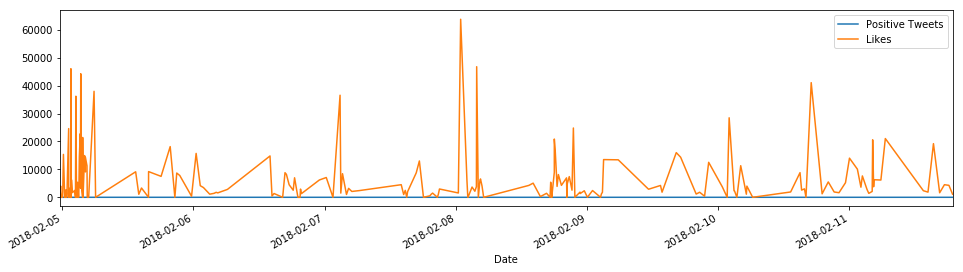

In [66]:
tpos.plot(figsize=(16,4),label="Positive Tweets",legend=True)
tlike.plot(figsize=(16,4),label="Likes",legend=True);